## Data processing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

np.random.seed(42)

def process_and_split_data(meta_file, observation_file, train_ratio, test_ratio):
    """
    Process the datasets and split them into training and testing subsets separately for meta and observation data.

    :param meta_file: File path for the METAinfo dataset.
    :param observation_file: File path for the ppt.complete.Y001 dataset.
    :param train_ratio: Percentage of the data to be used for training (default 10%).
    :param test_ratio: Percentage of the data to be used for testing (default 1%).
    :return: None
    """
    # Read the datasets without headers
    meta_data = pd.read_csv(meta_file, header=None)
    observation_data = pd.read_csv(observation_file, header=None)
    
    # Assuming meta_data and observation_data are of the same length
    n_rows = len(meta_data)

    # Generate random indices
    all_indices = np.arange(n_rows)
    train_and_test_indices = np.random.choice(all_indices, size=int((train_ratio + test_ratio) * n_rows), replace=False)

    # Split indices into training and testing
    train_indices, test_indices = train_test_split(train_and_test_indices, test_size=test_ratio / (train_ratio + test_ratio), random_state=42)

    # Sample data using the same indices for both datasets
    meta_train = meta_data.iloc[train_indices]
    meta_test = meta_data.iloc[test_indices]
    observation_train = observation_data.iloc[train_indices]
    observation_test = observation_data.iloc[test_indices]

    # # Sample 11% of each dataset
    # meta_sample = meta_data.sample(frac=train_ratio + test_ratio)
    # observation_sample = observation_data.sample(frac=train_ratio + test_ratio)

    # # Split the sample data into 10% training and 1% testing for both datasets
    # meta_train, meta_test = train_test_split(meta_sample, test_size=test_ratio / (train_ratio + test_ratio), random_state = 42)
    # observation_train, observation_test = train_test_split(observation_sample, test_size=test_ratio / (train_ratio + test_ratio), random_state = 42)

    # Save the split data
    meta_train.to_csv(
        os.path.join(data_folder, 'meta_train_' + str(ratio)), 
        index=False, header=False)
    print(meta_train.shape)
    meta_test.to_csv(
        os.path.join(data_folder, 'meta_test_' + str(ratio)), 
        index=False, header=False)
    print(meta_test.shape)
    observation_train.to_csv(
        os.path.join(data_folder, 'observation_train_' + str(ratio)), 
        index=False, header=False)
    observation_test.to_csv(
        os.path.join(data_folder, 'observation_test_'+ str(ratio)), 
        index=False, header=False)

    print("Data processing complete. Files saved for both meta and observation datasets.")

data_folder = './soil_moist/'
ratio = 0.25
# Example usage
process_and_split_data(
    os.path.join(data_folder, 'METAinfo'), 
    os.path.join(data_folder,'ppt.complete.Y001'),
    ratio, ratio * 0.1
)
ratio = 0.125
# Example usage
process_and_split_data(
    os.path.join(data_folder, 'METAinfo'), 
    os.path.join(data_folder,'ppt.complete.Y001'),
    ratio, ratio * 0.1
)

(500000, 2)
(50000, 2)
Data processing complete. Files saved for both meta and observation datasets.
(250000, 2)
(25000, 2)
Data processing complete. Files saved for both meta and observation datasets.


In [9]:
import pandas as pd
data_folder = './soil_moist/'
df = pd.read_csv(os.path.join(data_folder,'ppt.complete.Y001'), header=None, names=['z'])
df.var()

z    1.000102
dtype: float64

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_subplots_with_scatter(train_meta_file, train_obs_file, test_meta_file, test_obs_file):
    # Load the data
    train_meta = pd.read_csv(train_meta_file, header=None)
    train_obs = pd.read_csv(train_obs_file, header=None)
    test_meta = pd.read_csv(test_meta_file, header=None)
    test_obs = pd.read_csv(test_obs_file, header=None)
    
    # Convert data to numpy arrays if they're not already
    all_train_data = np.array(train_meta)
    all_train_obs = np.array(train_obs).flatten()  # Flatten in case the observations are in a 2D array
    all_test_data = np.array(test_meta)
    all_test_obs = np.array(test_obs).flatten()
    
    # Create subplots
    fig, axs = plt.subplots(1, 1, figsize=(8, 4))
    
    # Scatter plot for training data
    scatter_train = axs.scatter(all_train_data[:, 1] + 180, all_train_data[:, 0], c=all_train_obs, 
                            #  vmin=np.min(all_train_obs), vmax=np.max(all_train_obs), 
                             cmap="jet", s=3)
    # Create a colorbar
    cbar = fig.colorbar(scatter_train, ax=axs)
    cbar.ax.tick_params(labelsize =14)
    
    # axs.set_title('Training Data')
    axs.set_xlabel('Longitude', fontsize = 14)
    axs.set_ylabel('Latitude', fontsize = 14)
    
    # tick modification
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    plt.tight_layout()
    plt.savefig('./fig/realdataset/soil_subsampling.jpeg', dpi=100)
    plt.show()

# Example usage
# plot_subplots_with_scatter('meta_train.csv', 'observation_train.csv', 'meta_test.csv', 'observation_test.csv')

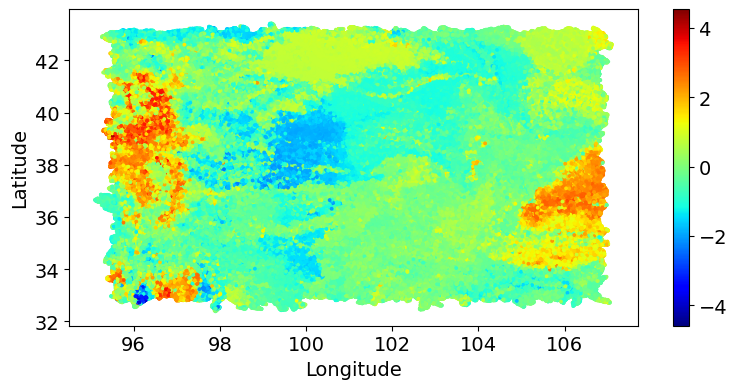

In [44]:
plot_subplots_with_scatter(
    './soil_moist/meta_train_0.25', 
    './soil_moist/observation_train_0.25',
    './soil_moist/meta_test_0.25', 
    './soil_moist/observation_test_0.25'   
)

## Plot the experiment result

In [7]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import csv

data_path = './log/soil'

In [6]:
def read_results(locs_set, cs_set):
    results = {
        "cs_num":[],
        "Iterations":[],
        "Variance":[],
        "Range": [],
        "Smoothness": [],
        "log-likelihood":[]
    }

    for _los_num in locs_set:
        for _cs_num in cs_set:
            with open(os.path.join(data_path, f'locs_{_los_num}_cs_{_cs_num}_random'), 'r') as file:
                reader = csv.reader(file)
                # Skip the first line (header)
                next(reader)
                # Read the second line
                second_line = next(reader)
            results["cs_num"].append(_cs_num) # iteration
            results["Iterations"].append(int(second_line[0])) # iteration
            results["Variance"].append(float(second_line[1])) # iteration
            results["Range"].append(float(second_line[2])) # iteration
            results["Smoothness"].append(float(second_line[3])) # iteration
            results["log-likelihood"].append(float(second_line[4])) # iteration
    return results

In [8]:
results_250k = read_results([250000], [30, 60, 90, 120, 150])

In [9]:
results_500k = read_results([500000], [30, 60, 90, 120])

In [32]:
def plot_params(results, param_name, ylabel, fig_path, problem_size):
    plt.figure(figsize=(5, 4))

    plt.plot(results['cs_num'], results[param_name], linewidth=1.5, marker="s", label='Vecchia')

    plt.legend()
    plt.xlabel("Conditioning size")
    plt.ylabel(ylabel)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig(os.path.join(fig_path, str(problem_size) + "_" + param_name + ".pdf"))
    plt.show()

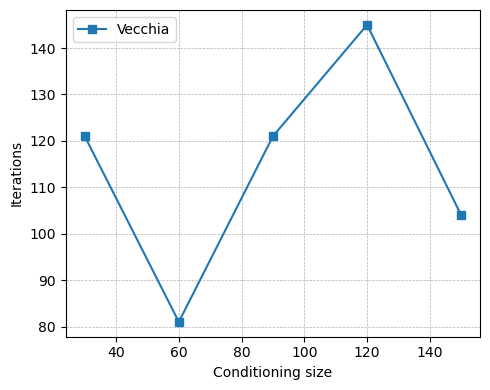

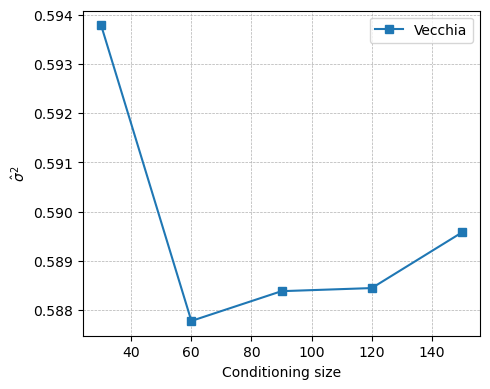

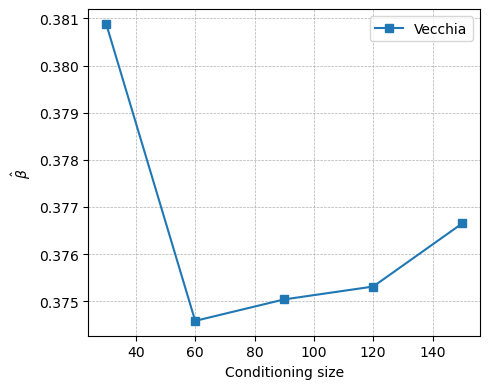

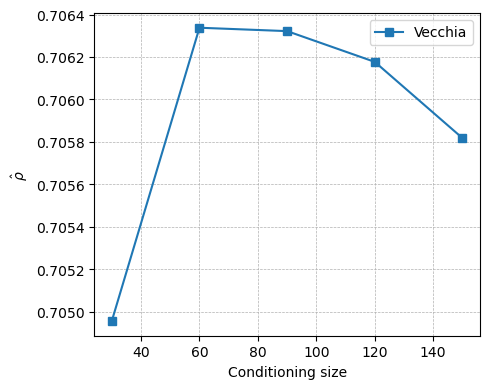

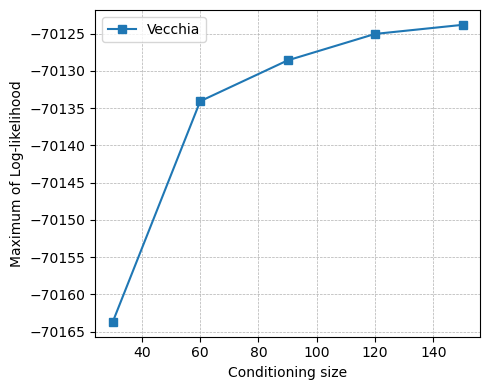

In [33]:
param_names = list(results_250k.keys())[1:]
ylabel_names = ["Iterations", r"$\hat\sigma^2$",  r"$\hat \beta$", r"$\hat \rho$", 'Maximum of Log-likelihood'] 

figpath = './fig/soil_results'
if not os.path.exists(figpath):
    os.mkdir(figpath)

for _param_name, _ylabel_name in zip(param_names, ylabel_names):
    plot_params(results=results_250k, param_name = _param_name, 
                ylabel=_ylabel_name, fig_path=figpath, problem_size=2500000)

In [ ]:
param_names = list(results_500k.keys())[1:]
ylabel_names = ["Iterations", r"$\hat\sigma^2$",  r"$\hat \beta$", r"$\hat \rho$", 'Maximum of Log-likelihood'] 

figpath = './fig/soil_results'
if not os.path.exists(figpath):
    os.mkdir(figpath)

for _param_name, _ylabel_name in zip(param_names, ylabel_names):
    plot_params(results=results_500k, param_name = _param_name, 
                ylabel=_ylabel_name, fig_path=figpath, problem_size=5000000)